# GDAL - Geospatial Data Access Library

## Open dataset and fetch information

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import gdal


dataset = gdal.Open('/vagrant/shared/test_data/meris_l1/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1')
print 'Size is %d x %d x %d' % (dataset.RasterXSize,
                                dataset.RasterYSize,
                                dataset.RasterCount)
print dataset.GetMetadata()['MPH_SENSING_START']

Size is 4481 x 769 x 17
03-MAR-2012 09:38:10.449011


### Access band and fetch raw data

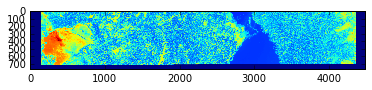

In [2]:
band = dataset.GetRasterBand(1)
array = band.ReadAsArray()
plt.imshow(array)

### Read subsection of the image

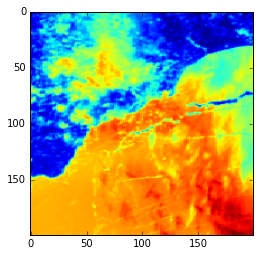

In [3]:
arr1 = band.ReadAsArray(xoff=200, yoff=200,
                        win_xsize=200, win_ysize=200)
plt.imshow(arr1)

### Compute histogram

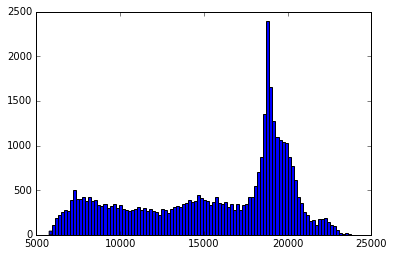

In [4]:
ans = plt.hist(arr1.flatten(), 100)

### Calculate band ratio

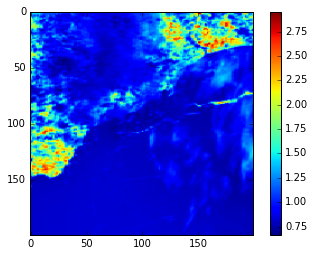

In [5]:
arr2 = dataset.GetRasterBand(8).ReadAsArray(200, 200, 200, 200).astype('float32')
plt.imshow(arr1/arr2);plt.colorbar()

### Create scatter-plot of two bands

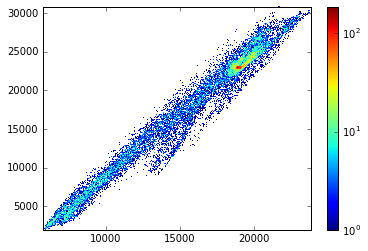

In [6]:
from matplotlib.colors import LogNorm
ans = plt.hist2d(arr1.flatten(), arr2.flatten(), 300, norm=LogNorm())
plt.colorbar()

## Command line tools

### Get information about the dataset 

In [7]:
!/home/vagrant/miniconda/bin/gdalinfo /vagrant/shared/test_data/meris_l1/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1

Driver: ESAT/Envisat Image Format
Files: /vagrant/shared/test_data/meris_l1/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1
Size is 4481, 769
Coordinate System is `'
GCP Projection = 
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
GCP[  0]: Id=1, Info=
          (0.5,0.5) -> (34.698006,61.259824,0)
GCP[  1]: Id=2, Info=
          (64.5,0.5) -> (34.427957,61.334252,0)
GCP[  2]: Id=3, Info=
          (128.5,0.5) -> (34.156082,61.408287,0)
GCP[  3]: Id=4, Info=
          (192.5,0.5) -> (33.883449,61.481635,0)
GCP[  4]: Id=5, Info=
          (256.5,0.5) -> (33.612048,61.553771,0)
GCP[  5]: Id=6, Info=
          (320.5,0.5) -> (33.337121,61.625957,0)
GCP[  6]: Id=7, Info=
          (384.5,0.5) -> (33.0

### Translate data from one format to another

In [8]:
!/home/vagrant/miniconda/bin/gdal_translate -b 1 /vagrant/shared/test_data/meris_l1/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1 temp1.tif
!ls -l

Input file size is 4481, 769
0...10...20...30...40...50...60...70...80...90...100 - done.
total 19336
-rwxr-xr-x 1 vagrant vagrant     613 Apr  5 13:24 01 hello-world.ipynb
-rwxr-xr-x 1 vagrant vagrant   18269 Jul  6 13:04 02 basic types.ipynb
-rwxr-xr-x 1 vagrant vagrant   12920 Jul  6 13:05 03 object oriented programming.ipynb
-rwxr-xr-x 1 vagrant vagrant  510379 Jul  6 13:05 05 advanced plotting.ipynb
-rwxr-xr-x 1 vagrant vagrant  857569 Jul  6 13:07 06 scipy.ipynb
-rwxr-xr-x 1 vagrant vagrant  450193 Apr  6 13:24 07 GDAL.ipynb
-rwxr-xr-x 1 vagrant vagrant  267088 Apr  6 13:24 08 Basemap.ipynb
-rwxr-xr-x 1 vagrant vagrant  138835 Apr  6 13:25 09 Nansat introduction.ipynb
-rwxr-xr-x 1 vagrant vagrant  174667 Apr  6 13:27 10 Nansat Use Case 01.ipynb
-rwxr-xr-x 1 vagrant vagrant  156724 Apr  6 13:27 11 Nansat Use Case 02.ipynb
-rwxr-xr-x 1 vagrant vagrant  332099 Apr  6 13:33 12b Nansat Use Case 04.ipynb
-rwxr-xr-x 1 vagrant vagrant 2036201 Apr  6 13:29 12 Nansat Use Case 03.ipynb
-rwx

### Reproject data from one grid to another

In [9]:
!/home/vagrant/miniconda/bin/gdalwarp -t_srs '+proj=longlat' -te 12 61 34 65 -ts 0.1 0.1 -overwrite temp1.tif  temp2.tif

Creating output file that is 4400P x 800L.
Processing input file temp1.tif.
0...10...20...30...40...50...60...70...80...90...100 - done.


### View results of reprojection

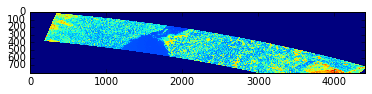

In [10]:
ds = gdal.Open('temp2.tif')
b = ds.GetRasterBand(1)
a = b.ReadAsArray()
plt.imshow(a)